In [1]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

### RNA-seq short-read sequencing data

In [2]:
dataset = pd.read_table('~/projects2014-metagenome/scripts/metasub/metasub_list.txt', header=None).values.ravel()

In [3]:
dataset

array(['/cluster/work/grlab/projects/metagenome/benchmark_metasub/csd_2016/haib17CEM4890/H2NYMCCXY/CSD16-FAI-0157_2.fastq.gz',
       '/cluster/work/grlab/projects/metagenome/benchmark_metasub/csd_2016/haib17CEM4890/H2NYMCCXY/CSD16-FAI-0157_1.fastq.gz',
       '/cluster/work/grlab/projects/metagenome/benchmark_metasub/csd_2017/haib17CEM5106/HCCGHCCXY/5106-CEM-0524_1.fastq.gz',
       ...,
       '/cluster/work/grlab/projects/metagenome/benchmark_metasub/csd_2017/haib17CEM5106/HCCGHCCXY/5106-CEM-0555_1.fastq.gz',
       '/cluster/work/grlab/projects/metagenome/benchmark_metasub/csd_2017/haib17CEM5106/HCCGHCCXY/5106-CEM-0604_2.fastq.gz',
       '/cluster/work/grlab/projects/metagenome/benchmark_metasub/csd_2017/haib17CEM5106/HCCGHCCXY/5106-CEM-0604_1.fastq.gz'],
      dtype=object)

In [4]:
print('Files in the dataset: {}'.format(len(dataset)))
print('Size of the dataset: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in dataset]) / 2**30))

Files in the dataset: 2816
Size of the dataset: 2255.74 Gib


In [5]:
data_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in dataset],
                      index=[x.split('/')[-1][:-len('.fastq.gz')] for x in dataset])
data_size.head()

CSD16-FAI-0157_2    51.149709
CSD16-FAI-0157_1    44.143816
5106-CEM-0524_1     23.070721
5106-CEM-0718_2     16.073002
5106-CEM-0719_2     15.750460
dtype: float64

In [6]:
data = pd.DataFrame(data_size, columns=['ComprData'])
data['metasub_name'] = data.index
data.metasub_name = data.metasub_name.apply(lambda x: x[:-2])
data.head()

,ComprData,metasub_name
CSD16-FAI-0157_2,51.149709,CSD16-FAI-0157
CSD16-FAI-0157_1,44.143816,CSD16-FAI-0157
5106-CEM-0524_1,23.070721,5106-CEM-0524
5106-CEM-0718_2,16.073002,5106-CEM-0718
5106-CEM-0719_2,15.750460,5106-CEM-0719


In [7]:
metadata = pd.read_table('/cluster/work/grlab/projects/metagenome/benchmark_metasub/metadata/sample_metadata.merged.tsv')

In [8]:
metadata.tail()

,sl_name,metasub_name,barcode,plate_id,plate_position,city,elevation,latitude,longitude,project,setting,surface,surface_material,traffic_level
1296,SL271186,5106-cem-0408,None,plate_0005,h08,london,above_ground_open,51.523436,-0.259700,csd17,urban,handrail,metal,NaN
1297,SL271187,5106-cem-0409,None,plate_0005,h09,london,above_ground_open,51.516648,-0.247482,csd17,urban,handrail,metal,NaN
1298,SL271188,5106-cem-0410,None,plate_0005,h10,london,above_ground_open,51.512044,-0.224222,csd17,urban,handrail,metal,NaN
1299,SL271189,5106-cem-0411,None,plate_0005,h11,london,under_ground,51.504521,-0.218739,csd17,urban,handrail,metal,NaN
1300,SL271190,5106-cem-0412,None,plate_0005,h12,london,under_ground,51.507405,-0.205705,csd17,urban,handrail,metal,NaN


In [9]:
df = pd.merge(data, metadata, on='metasub_name', how='left')
df.head()

,ComprData,metasub_name,sl_name,barcode,plate_id,plate_position,city,elevation,latitude,longitude,project,setting,surface,surface_material,traffic_level
0,51.149709,CSD16-FAI-0157,None,None,None,None,fai,NaN,NaN,NaN,csd16,NaN,NaN,NaN,NaN
1,44.143816,CSD16-FAI-0157,None,None,None,None,fai,NaN,NaN,NaN,csd16,NaN,NaN,NaN,NaN
2,23.070721,5106-CEM-0524,None,None,plate_0007,b04,london,NaN,NaN,NaN,csd17,NaN,NaN,NaN,NaN
3,16.073002,5106-CEM-0718,None,None,plate_0009,b06,london,NaN,NaN,NaN,csd17,NaN,NaN,NaN,NaN
4,15.750460,5106-CEM-0719,None,None,plate_0009,b07,london,NaN,NaN,NaN,csd17,NaN,NaN,NaN,NaN


In [10]:
df.shape

(2816, 15)

In [11]:
for col in df.columns:
    print('\n', col, ':')
    print(df.loc[:, col].unique())


 ComprData :
[5.11497090e+01 4.41438160e+01 2.30707211e+01 ... 1.18255895e-03
 2.44291499e-04 2.35131010e-04]

 metasub_name :
['CSD16-FAI-0157' '5106-CEM-0524' '5106-CEM-0718' ... '4959-DB-1301.'
 '5106-CEM-0555' '5106-CEM-0604']

 sl_name :
['None' nan]

 barcode :
['None' nan]

 plate_id :
['None' 'plate_0007' 'plate_0009' 'plate_0006' 'zymo plate 1' nan
 'plate_0008' 'zymo plate 2']

 plate_position :
['None' 'b04' 'b06' 'b07' 'h04' 'a12' nan 'd06' 'c04' 'c02' 'h02' 'b03'
 'e03' 'c07' 'f10' 'c08' 'c01' 'f09' 'h05' 'g09' 'g10' 'g12' 'f02' 'a10'
 'f11' 'g01' 'c09' 'a07' 'h03' 'd03' 'd08' 'c10' 'b10' 'b11' 'g05' 'h06'
 'd07' 'f04' 'c03' 'd02' 'g11' 'f03' 'e02' 'h11' 'c05' 'g02' 'd01' 'b02'
 'g04' 'g08' 'a08' 'a03' 'b09' 'b05' 'f08' 'b12' 'd05' 'e01' 'a02' 'b08'
 'e06' 'e12' 'c06' 'h08' 'h07' 'g07' 'c11' 'd04' 'c12' 'a04' 'g06' 'h01'
 'e04' 'f01' 'e09' 'e08' 'd09' 'a06' 'g03' 'h10' 'f05' 'a05' 'a11' 'h09'
 'd10' 'b01' 'e07' 'f12' 'd12' 'e11' 'f07' 'e05' 'e10' 'h12' 'a09' 'd11'
 'f06' 

In [12]:
del df['sl_name']
del df['barcode']
del df['traffic_level']
del df['setting']

In [53]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='sans serif')#, serif='Times')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=14)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
#params = {
#'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
#}
#plt.rcParams.update(params)

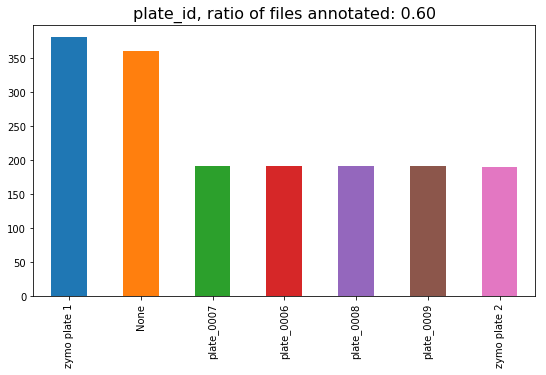

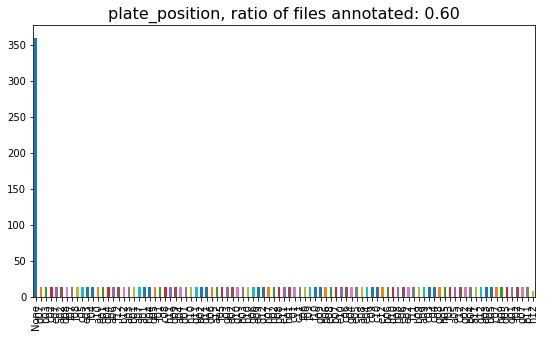

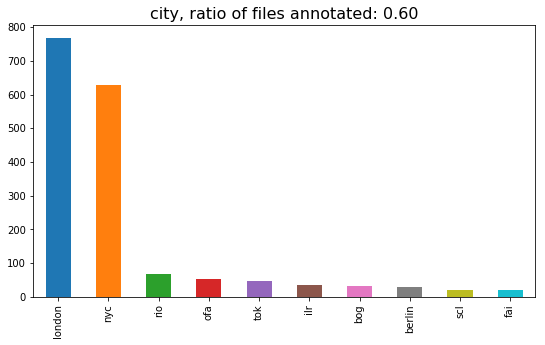

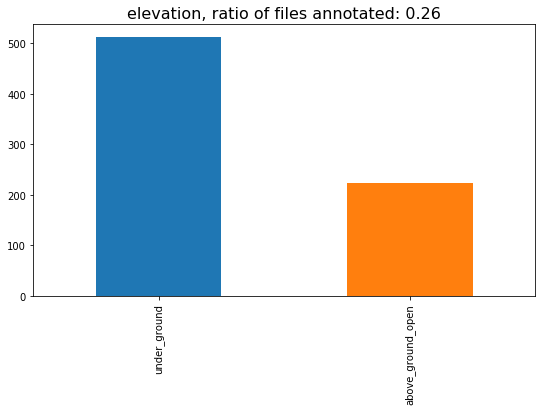

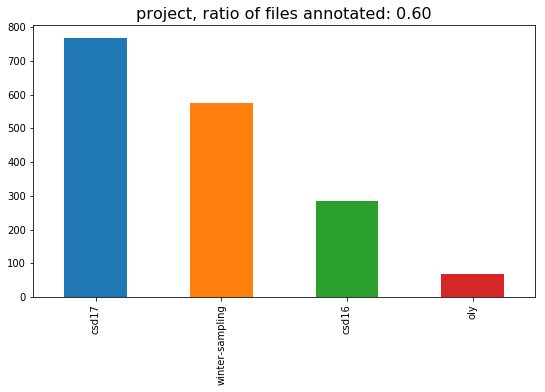

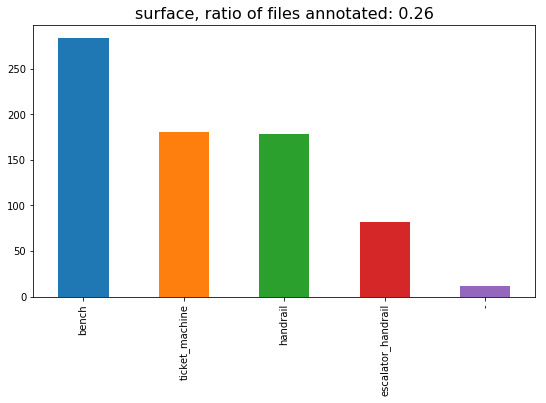

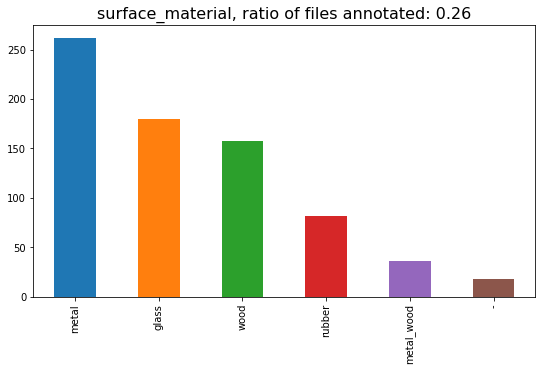

In [13]:
for col in df.columns:
    if (len(df.loc[:, col].unique()) < 100):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.set_title('{}, ratio of files annotated: {:.2f}'.format(col, np.mean(~df.loc[:, col].isna())), size=16)
        pd.value_counts(df.loc[:, col]).iloc[:100].plot.bar(ax=ax)
        plt.show()